# Importing libraries and preprocessing

In [1]:
!pip install split-folders




In [2]:
import os
import numpy as np
import splitfolders
import csv
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image
from skimage import transform
from tensorflow.keras.preprocessing import image as keras_image


In [4]:
# pwd
os.chdir(r'C:\Users\arman\Downloads\state-farm-distracted-driver-detection')

In [5]:
pwd

'C:\\Users\\arman\\Downloads\\state-farm-distracted-driver-detection'

In [6]:

data = {}
with open('driver_imgs_list.csv') as f:
  reader = csv.reader(f)
  next(reader)
  for row in reader:
    key = row[1]
    if key in data:
      data[key].append(row[2])
    else:
      data[key] = [row[2]]

In [7]:
pwd

'C:\\Users\\arman\\Downloads\\state-farm-distracted-driver-detection'

In [8]:
expressions_list = set(list(data.keys()))

In [9]:
expressions_list

{'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'}

In [41]:
#donot
splitfolders.ratio(r'C:\Users\arman\Downloads\state-farm-distracted-driver-detection\imgs\train', output="output", seed=1337, ratio=(.8, 0.1,0.1))

# Defining model architecture

In [20]:
#don't
# building and compiling model using CNN
model = tf.keras.models.Sequential(
    [
        Conv2D(16, (3,3), activation = 'relu', input_shape = (100,100,3)),
        MaxPooling2D(2,2),
        Conv2D(32, (3,3), activation = 'relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation = 'relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(512, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ]
)
model.compile(optimizer = 'adam', loss = categorical_crossentropy,metrics = ['accuracy'])
model.summary()

C:\Users\arman\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,026 (12.61 MB)

 Trainable params: 3,306,026 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#train_dir = r'/content/drive/MyDrive/DDD_dataset/output/train'
#test_dir = r'/content/drive/MyDrive/DDD_dataset/output/test'
#valid_dir = r'/content/drive/MyDrive/DDD_dataset/output/val'
train_dir = r'C:\Users\arman\Downloads\state-farm-distracted-driver-detection\output\train'
test_dir = r'C:\Users\arman\Downloads\state-farm-distracted-driver-detection\output\test'
valid_dir = r'C:\Users\arman\Downloads\state-farm-distracted-driver-detection\output\val'

# image datagenerator allows to extract features from image, also note that
# we are doing some preprocessing simultaneously.
train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (100,100), class_mode = 'categorical',
    batch_size = 128
)

test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size = (100,100), class_mode = 'categorical',
    batch_size = 128
)

valid_datagen = ImageDataGenerator(rescale = 1.0/255)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size = (100,100), class_mode = 'categorical',
    batch_size = 128
)

Found 17934 images belonging to 10 classes.
Found 2253 images belonging to 10 classes.
Found 2237 images belonging to 10 classes.


In [27]:
#don't
# to prevent the model from unnecessary training
es = EarlyStopping(monitor = 'accuracy', patience = 2, min_delta = 0.01)

In [29]:
#don't
# Training DL model
history = model.fit(train_generator, epochs = 8, verbose = 1, batch_size = 500, validation_data = valid_generator, callbacks = [es])

Epoch 1/8


C:\Users\arman\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 409s 3s/step - accuracy: 0.3971 - loss: 1.7125 - val_accuracy: 0.9598 - val_loss: 0.1659
Epoch 2/8
141/141 ━━━━━━━━━━━━━━━━━━━━ 114s 771ms/step - accuracy: 0.9644 - loss: 0.1326 - val_accuracy: 0.9826 - val_loss: 0.0641
Epoch 3/8
141/141 ━━━━━━━━━━━━━━━━━━━━ 103s 708ms/step - accuracy: 0.9882 - loss: 0.0463 - val_accuracy: 0.9794 - val_loss: 0.0642
Epoch 4/8
141/141 ━━━━━━━━━━━━━━━━━━━━ 93s 627ms/step - accuracy: 0.9931 - loss: 0.0250 - val_accuracy: 0.9888 - val_loss: 0.0396
Epoch 5/8
141/141 ━━━━━━━━━━━━━━━━━━━━ 78s 531ms/step - accuracy: 0.9968 - loss: 0.0120 - val_accuracy: 0.9835 - val_loss: 0.0532


In [19]:
from keras.models import load_model
#model.save(r"C:\Users\arman\Downloads\model\model.h5") 
model = load_model(r"C:\Users\arman\Downloads\model\model.h5")

# Evaluation and visualisation

In [21]:
scores = model.evaluate(test_generator)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))


C:\Users\arman\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9868 - loss: 0.0471
evaluate compile_metrics: 98.85%


In [22]:
#error
def plot_train_history(history):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_train_history(history)


NameError: name 'history' is not defined

In [22]:
valid_samples = 1742
batch_size = 128
score = model.evaluate(valid_generator, steps=valid_samples // batch_size, verbose=1)
print("Test loss:", score[0])
print("Test Accuracy:", score[1])


13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9847 - loss: 0.0475
Test loss: 0.05366259068250656
Test Accuracy: 0.9837740659713745


# Prediction

In [23]:
#r'C:\Users\Utkarsh\Desktop\ML-workspace\DDD\imgs\test\img_531.jpg'
def predict_image_class(image_path):
    # Load the image and resize it to match the input size of the model
    img = keras_image.load_img(image_path, target_size=(100, 100, 3))
    # Convert the image to a numpy array
    img_array = keras_image.img_to_array(img)
    # Expand the dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (normalize pixel values)
    img_array = img_array / 255.0
    # Make prediction
    prediction = model.predict(img_array)
    # Get the predicted class
    predicted_class = np.argmax(prediction)
    # Return the predicted class
    return predicted_class

image_path = r"C:\Users\arman\Downloads\state-farm-distracted-driver-detection\imgs\test\img_99919.jpg"
# image_path = r'C:\Users\Utkarsh\Desktop\ML-workspace\DDD\imgs\test\img_531.jpg'
predicted_class = predict_image_class(image_path)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


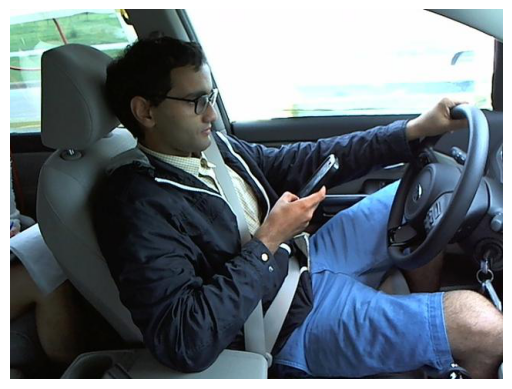

Class meaning: Texting - right


In [24]:
import matplotlib.image as mpimg

def display_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

# Example usage:
display_image(image_path)
def get_class_meaning(class_index):
    class_meanings = {
        0: 'Safe driving',
        1: 'Texting - right',
        2: 'Talking on the phone - right',
        3: 'Texting - left',
        4: 'Talking on the phone - left',
        5: 'Operating the radio',
        6: 'Drinking',
        7: 'Reaching behind',
        8: 'Hair and makeup',
        9: 'Talking to passenger'
    }

    return class_meanings.get(class_index, 'Unknown class')

# Example usage:
class_meaning = get_class_meaning(predicted_class)
print("Class meaning:", class_meaning)

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.preprocessing import image as keras_image
from IPython.display import display, Image as IPImage

# Load pre-trained model
model = load_model(r"C:\Users\arman\Downloads\model\model.h5")

# Function to predict image class
def predict_image_class(image_path):
    img = keras_image.load_img(image_path, target_size=(100, 100, 3))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Function to get the meaning of the predicted class
def get_class_meaning(class_index):
    class_meanings = {
        0: 'Safe driving',
        1: 'Texting - right',
        2: 'Talking on the phone - right',
        3: 'Texting - left',
        4: 'Talking on the phone - left',
        5: 'Operating the radio',
        6: 'Drinking',
        7: 'Reaching behind',
        8: 'Hair and makeup',
        9: 'Talking to passenger'
    }
    return class_meanings.get(class_index, 'Unknown class')

# Function to display image
def display_image(image_path):
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Path to image for testing
image_path = r"C:\Users\arman\Downloads\state-farm-distracted-driver-detection\imgs\test\img_99919.jpg"

# Display the image
display_image(image_path)

# Predict and display the result
predicted_class = predict_image_class(image_path)
class_meaning = get_class_meaning(predicted_class)

print(f"Predicted Class: {predicted_class} - {class_meaning}")

C:\Users\arman\AppData\Local\Temp\ipykernel_5360\3930174998.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Predicted Class: 1 - Texting - right
